# Notebook 3: Visualisierung

**Projekt:** Analyse der Haushaltsausgaben in der Schweiz (2006-2022)  
**Autor:** CAS Information Engineering - ZHAW  
**Version:** 1.0  
**Datum:** 17. Oktober 2025

---

## Ziel dieses Notebooks

Dieses Notebook implementiert die **Datenvisualisierung** gemäß den funktionalen Anforderungen FA-03.1 bis FA-03.4:

- **FA-03.1:** Erstellung Visualisierung 1 (Zeitreihe Gesamtausgaben)
- **FA-03.2:** Erstellung Visualisierung 2 (Heatmap Alter vs. Kategorie - PFLICHT)
- **FA-03.3:** Erstellung einer optionalen Visualisierung (Boxplot Haushaltstypen)
- **FA-03.4:** Sicherstellung eines professionellen Layouts und Exports als PNG.

Es lädt die bereinigten Daten aus `data/processed/` und die Analyseergebnisse aus `outputs/tables/`.

---

## Inhaltsverzeichnis

1. [Initialisierung](#1-initialisierung)
2. [Laden der Daten](#2-laden)
3. [Visualisierung 1: Zeitreihe Gesamtausgaben (FA-03.1)](#3-vis1)
4. [Visualisierung 2: Heatmap Alter vs. Kategorie (FA-03.2)](#4-vis2)
5. [Optionale Visualisierung: Boxplot Haushaltstypen (FA-03.3)](#5-vis3)
6. [Zusammenfassung](#6-zusammenfassung)

---

## 1. Initialisierung <a id='1-initialisierung'></a>

### 1.1 Import der Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# --- Grundlegende Plot-Einstellungen (NFR-01, FA-03.4) ---
sns.set_theme(style="whitegrid") # Setzt einen ansprechenden Standardstil
plt.rcParams['figure.dpi'] = 100 # Standard-Auflösung für Inline-Plots
plt.rcParams['savefig.dpi'] = 300 # Hohe Auflösung für den Export (FA-03.4, 7.3)
plt.rcParams['font.size'] = 12 # Lesbare Schriftgröße (FA-03.4, 7.3)

print("Bibliotheken geladen und Plot-Stil gesetzt.")

Bibliotheken geladen und Plot-Stil gesetzt.


### 1.2 Pfade definieren

In [2]:
# Basis-Pfade definieren
BASE_DIR = Path.cwd().parent
PROCESSED_DATA_DIR = BASE_DIR / 'data' / 'processed'
OUTPUT_TABLES_DIR = BASE_DIR / 'outputs' / 'tables'
OUTPUT_FIGURES_DIR = BASE_DIR / 'outputs' / 'figures'

# Output-Ordner für Grafiken erstellen, falls nicht vorhanden
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print(f"Daten-Verzeichnis (Input): {PROCESSED_DATA_DIR}")
print(f"Tabellen-Verzeichnis (Input): {OUTPUT_TABLES_DIR}")
print(f"Grafik-Verzeichnis (Output): {OUTPUT_FIGURES_DIR}")

Daten-Verzeichnis (Input): c:\Users\samvo\source\repos\ScrpitingModulArbeit\data\processed
Tabellen-Verzeichnis (Input): c:\Users\samvo\source\repos\ScrpitingModulArbeit\outputs\tables
Grafik-Verzeichnis (Output): c:\Users\samvo\source\repos\ScrpitingModulArbeit\outputs\figures


---

## 2. Laden der Daten <a id='2-laden'></a>

Wir laden die bereinigten Daten aus Notebook 1 und die Analyseergebnisse aus Notebook 2.

In [3]:
def load_data(filename, data_dir):
    """Lädt eine CSV-Datei mit Fehlerbehandlung."""
    try:
        file_path = data_dir / filename
        df = pd.read_csv(file_path)
        print(f"✓ '{filename}' erfolgreich geladen (Shape: {df.shape})")
        return df
    except FileNotFoundError:
        print(f"✗ FEHLER: '{filename}' nicht gefunden in {data_dir}.")
        print("  -> Bitte sicherstellen, dass die vorherigen Notebooks gelaufen sind.")
        return None
    except Exception as e:
        print(f"✗ FEHLER beim Laden von {filename}: {e}")
        return None

# Bereinigte Daten laden
print("--- Lade bereinigte Daten (aus Notebook 1) ---")
df_gesamt = load_data('clean_gesamtausgaben.csv', PROCESSED_DATA_DIR)
df_alter = load_data('clean_alter.csv', PROCESSED_DATA_DIR)
df_haushaltstyp = load_data('clean_haushaltstyp.csv', PROCESSED_DATA_DIR)

# Analyseergebnisse laden
print("\n--- Lade Analyseergebnisse (aus Notebook 2) ---")
df_zusammenfassung = load_data('zusammenfassung.csv', OUTPUT_TABLES_DIR)

--- Lade bereinigte Daten (aus Notebook 1) ---
✓ 'clean_gesamtausgaben.csv' erfolgreich geladen (Shape: (1578, 4))
✓ 'clean_alter.csv' erfolgreich geladen (Shape: (17927, 5))
✓ 'clean_haushaltstyp.csv' erfolgreich geladen (Shape: (16135, 5))

--- Lade Analyseergebnisse (aus Notebook 2) ---
✓ 'zusammenfassung.csv' erfolgreich geladen (Shape: (504, 4))


In [4]:
# Kurze Überprüfung der geladenen Daten
if df_gesamt is not None:
    print("\n--- df_gesamt Info ---")
    df_gesamt.info()
    
if df_zusammenfassung is not None:
    print("\n--- df_zusammenfassung Head ---")
    display(df_zusammenfassung.head())


--- df_gesamt Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kategorie   1578 non-null   object 
 1   betrag_chf  1578 non-null   float64
 2   periode     1578 non-null   int64  
 3   datentyp    1578 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 49.4+ KB

--- df_zusammenfassung Head ---


,kategorie,mittelwert_2006,mittelwert_2022,veraenderung_prozent
0,4423.07: Gemachte Einladungen zu Mahlzeiten in...,0.581859,3.938703,576.917581
1,6632.07: Miete von Geräten und von DVDs und CDs,0.871433,4.494907,415.806502
2,4203.03: Prämien für die Reiseversicherung,0.638009,2.570778,302.937447
3,4423.08: Gemachte Einladungen zu Getränken in ...,0.406761,1.506625,270.395505
4,4428.03: Andere verschenkte Waren und Dienstle...,8.191509,28.956318,253.491848


---

## 3. Visualisierung 1: Zeitreihe Gesamtausgaben (FA-03.1) <a id='3-vis1'></a>

Wir visualisieren die Entwicklung der durchschnittlichen monatlichen Gesamtausgaben von 2006 bis 2022.

✓ Zeitreihen-Diagramm gespeichert unter: c:\Users\samvo\source\repos\ScrpitingModulArbeit\outputs\figures\zeitreihe_gesamtausgaben.png


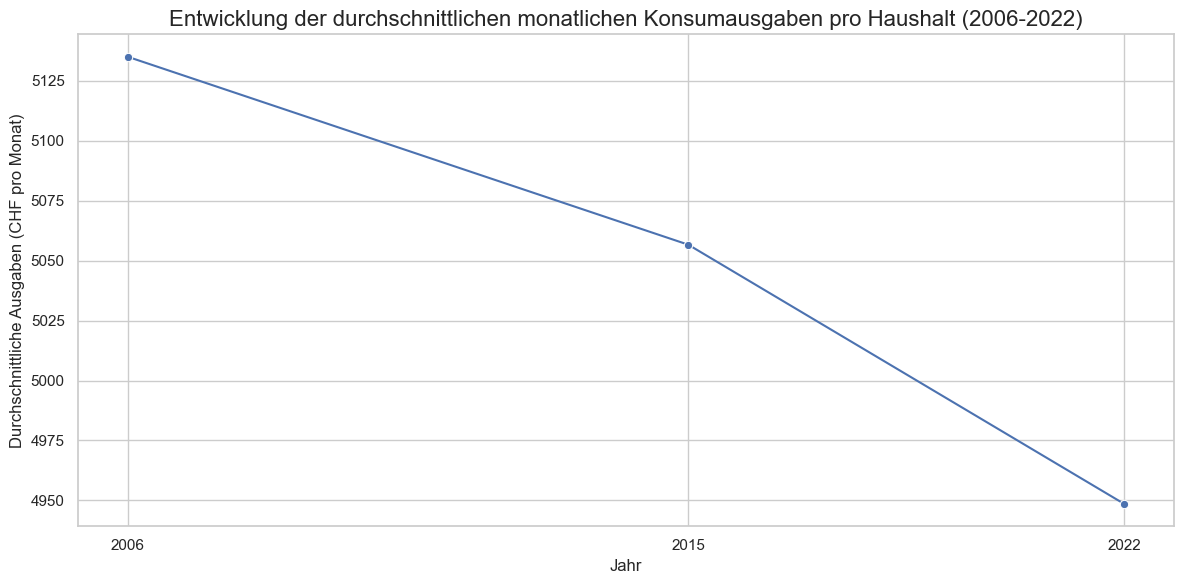

In [5]:
if df_gesamt is not None and 'periode' in df_gesamt.columns and 'betrag_chf' in df_gesamt.columns:
    # Daten aggregieren: Summe aller Ausgaben pro Jahr
    # Wir nehmen die Hauptkategorie '50: Konsumausgaben' als repräsentativen Wert für die Gesamtausgaben pro Haushalt
    gesamtausgaben_zeitreihe = df_gesamt[df_gesamt['kategorie'] == '50: Konsumausgaben'].groupby('periode')['betrag_chf'].mean().reset_index()
    gesamtausgaben_zeitreihe.columns = ['Jahr', 'Durchschnittliche Ausgaben (CHF)']
    
    # Plot erstellen
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=gesamtausgaben_zeitreihe, x='Jahr', y='Durchschnittliche Ausgaben (CHF)', marker='o')
    
    # Titel und Beschriftungen (FA-03.1)
    plt.title('Entwicklung der durchschnittlichen monatlichen Konsumausgaben pro Haushalt (2006-2022)', fontsize=16)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Durchschnittliche Ausgaben (CHF pro Monat)', fontsize=12)
    plt.xticks(gesamtausgaben_zeitreihe['Jahr'].unique()) # Sicherstellen, dass alle Jahre angezeigt werden
    plt.grid(True)
    plt.tight_layout() # Optimiert das Layout
    
    # Speichern als PNG (FA-03.1)
    output_path_ts = OUTPUT_FIGURES_DIR / 'zeitreihe_gesamtausgaben.png'
    plt.savefig(output_path_ts, dpi=300) 
    print(f"✓ Zeitreihen-Diagramm gespeichert unter: {output_path_ts}")
    
    plt.show()
else:
    print("✗ Daten für Zeitreihen-Visualisierung nicht verfügbar oder unvollständig.")

---

## 4. Visualisierung 2: Heatmap Alter vs. Kategorie (FA-03.2) <a id='4-vis2'></a>

Erstellung der PFLICHT-Heatmap, die die durchschnittlichen Ausgaben pro Altersgruppe für ausgewählte Hauptkategorien zeigt.

✓ Heatmap gespeichert unter: c:\Users\samvo\source\repos\ScrpitingModulArbeit\outputs\figures\heatmap_alter_kategorien.png


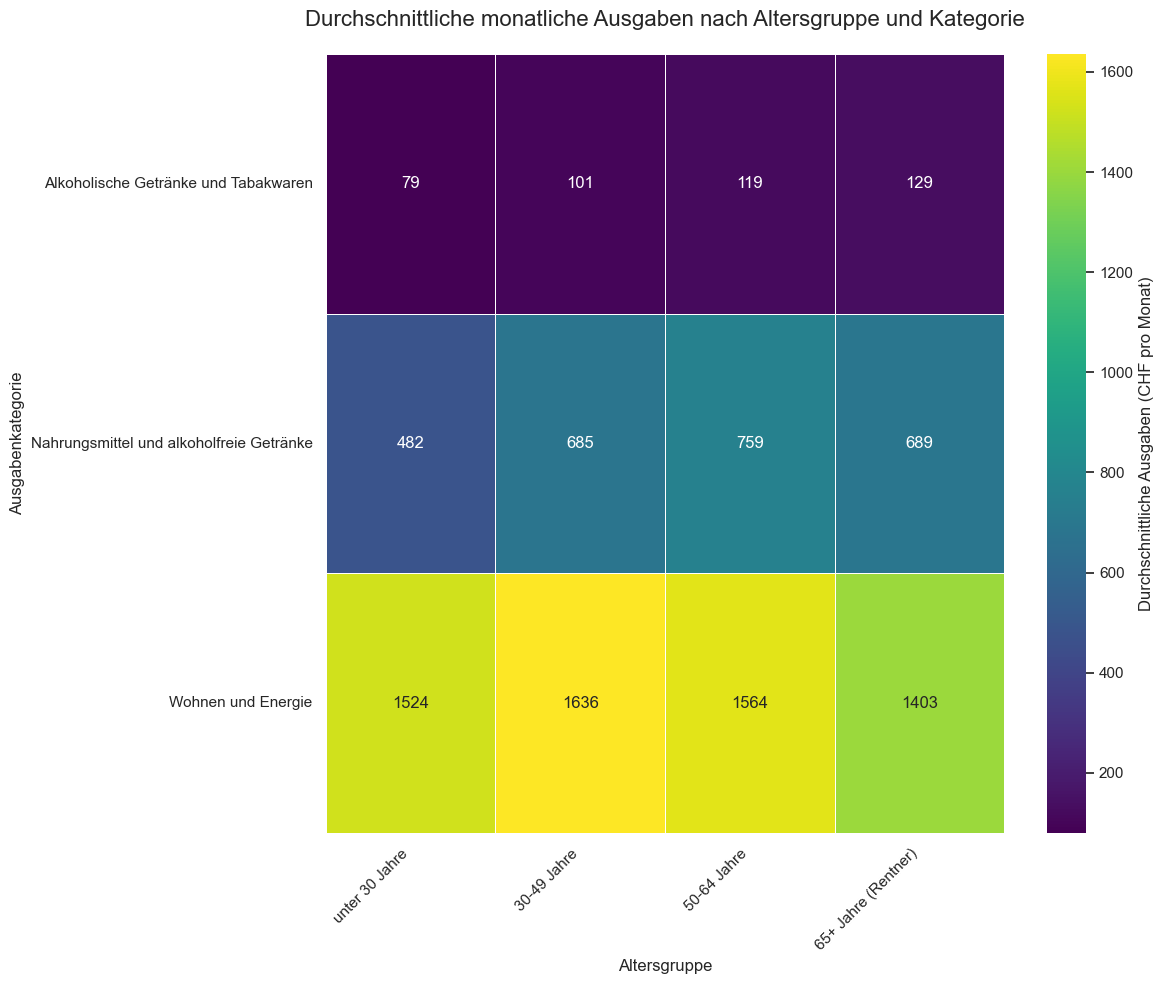

In [6]:
if df_alter is not None and 'altersgruppe' in df_alter.columns and 'kategorie' in df_alter.columns and 'betrag_chf' in df_alter.columns:
    
    # --- Datenaufbereitung für die Heatmap ---
    
    # 1. Hauptkategorien auswählen (um die Heatmap übersichtlich zu halten)
    # Wir nehmen die Ebene unter '50: Konsumausgaben'
    hauptkategorien = [
        '51: Nahrungsmittel und alkoholfreie Getränke',
        '52: Alkoholische Getränke und Tabakwaren',
        '53: Bekleidung und Schuhe',
        '57: Wohnen und Energie',
        '58: Hausrat und laufende Haushaltsführung',
        '59: Gesundheitspflege',
        '60: Verkehr',
        '61: Nachrichtenübermittlung',
        '62: Freizeit, Unterhaltung und Kultur',
        '63: Bildung',
        '64: Restaurants und Hotels',
        '65: Persönliche Ausgaben, Sozialschutz und Sonstiges'
    ]
    df_alter_filtered = df_alter[df_alter['kategorie'].isin(hauptkategorien)].copy()
    
    # 2. 'Total' und 'übrige' Altersgruppe entfernen für besseren Vergleich
    altersgruppen_vergleich = [
        'unter 30 Jahre', 
        '30-49 Jahre', 
        '50-64 Jahre', 
        '65+ Jahre (Rentner)'
    ]
    df_alter_filtered = df_alter_filtered[df_alter_filtered['altersgruppe'].isin(altersgruppen_vergleich)]
    
    # 3. Kategorienamen kürzen für bessere Lesbarkeit
    df_alter_filtered['kategorie_kurz'] = df_alter_filtered['kategorie'].str.split(': ').str[1]
    
    # 4. Pivot-Tabelle erstellen: Durchschnittliche Ausgaben pro Kategorie und Altersgruppe
    heatmap_data = df_alter_filtered.pivot_table(
        index='kategorie_kurz',
        columns='altersgruppe',
        values='betrag_chf',
        aggfunc='mean' 
    )
    
    # Reihenfolge der Spalten (Altersgruppen) festlegen
    heatmap_data = heatmap_data[altersgruppen_vergleich]
    
    # --- Plot erstellen --- 
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        heatmap_data,
        annot=True,     # Zeigt die Werte in den Zellen an
        fmt=".0f",      # Formatierung der Werte (keine Dezimalstellen)
        cmap="viridis", # Farbschema
        linewidths=.5,  # Linien zwischen den Zellen
        cbar_kws={'label': 'Durchschnittliche Ausgaben (CHF pro Monat)'} # Beschriftung der Farbleiste
    )
    
    # Titel und Beschriftungen (FA-03.2)
    plt.title('Durchschnittliche monatliche Ausgaben nach Altersgruppe und Kategorie', fontsize=16, pad=20)
    plt.xlabel('Altersgruppe', fontsize=12)
    plt.ylabel('Ausgabenkategorie', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotiert die x-Achsen-Beschriftungen
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Speichern als PNG (FA-03.2)
    output_path_hm = OUTPUT_FIGURES_DIR / 'heatmap_alter_kategorien.png'
    plt.savefig(output_path_hm, dpi=300)
    print(f"✓ Heatmap gespeichert unter: {output_path_hm}")

    plt.show()

else:
     print("✗ Daten für Heatmap-Visualisierung nicht verfügbar oder unvollständig.")

---

## 5. Optionale Visualisierung: Boxplot Haushaltstypen (FA-03.3) <a id='5-vis3'></a>

Wir vergleichen die Verteilung der Gesamtausgaben ('50: Konsumausgaben') zwischen den verschiedenen Haushaltstypen mittels eines Boxplots.

✓ Boxplot gespeichert unter: c:\Users\samvo\source\repos\ScrpitingModulArbeit\outputs\figures\boxplot_haushaltstyp.png


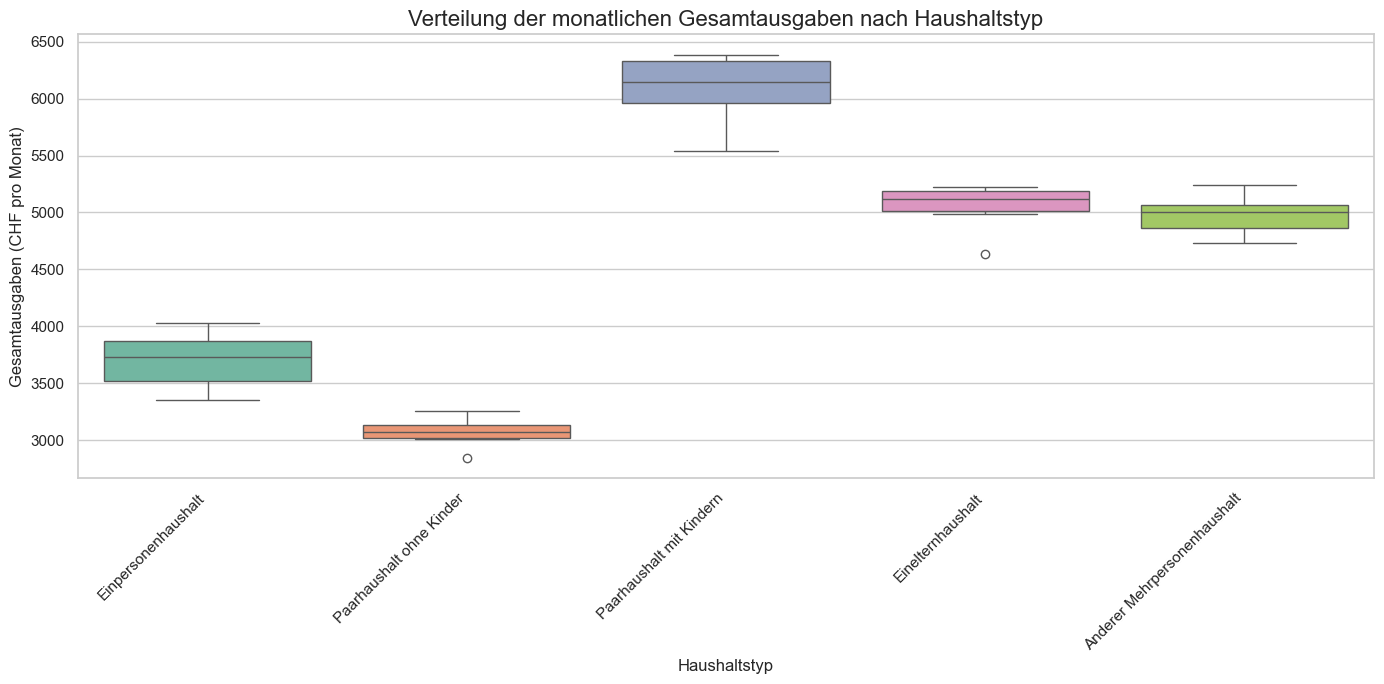

In [7]:
if df_haushaltstyp is not None and 'haushaltstyp' in df_haushaltstyp.columns and 'betrag_chf' in df_haushaltstyp.columns:
    
    # Filtern auf die Gesamtausgaben und relevante Haushaltstypen
    df_haushalt_gesamt = df_haushaltstyp[
        (df_haushaltstyp['kategorie'] == '50: Konsumausgaben') &
        (df_haushaltstyp['haushaltstyp'] != 'Total') # 'Total' ausschließen für Vergleich
    ].copy()
    
    # Plot erstellen
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=df_haushalt_gesamt, x='haushaltstyp', y='betrag_chf', palette='Set2')
    
    # Titel und Beschriftungen
    plt.title('Verteilung der monatlichen Gesamtausgaben nach Haushaltstyp', fontsize=16)
    plt.xlabel('Haushaltstyp', fontsize=12)
    plt.ylabel('Gesamtausgaben (CHF pro Monat)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotiert Labels für bessere Lesbarkeit
    plt.tight_layout()
    
    # Speichern als PNG (Optional, aber gute Praxis)
    output_path_box = OUTPUT_FIGURES_DIR / 'boxplot_haushaltstyp.png'
    plt.savefig(output_path_box, dpi=300)
    print(f"✓ Boxplot gespeichert unter: {output_path_box}")

    plt.show()
else:
    print("✗ Daten für Boxplot-Visualisierung nicht verfügbar oder unvollständig.")

---

## 6. Zusammenfassung <a id='6-zusammenfassung'></a>

### Erstellte Visualisierungen

In diesem Notebook wurden die folgenden Visualisierungen erstellt und im Ordner `outputs/figures/` gespeichert:

1. **`zeitreihe_gesamtausgaben.png`:** Entwicklung der durchschnittlichen monatlichen Gesamtausgaben (FA-03.1).
2. **`heatmap_alter_kategorien.png`:** Durchschnittliche Ausgaben nach Altersgruppe und Hauptkategorie (FA-03.2 - PFLICHT).
3. **`boxplot_haushaltstyp.png`:** Verteilung der Gesamtausgaben nach Haushaltstyp (FA-03.3 - Optional).

Die Diagramme erfüllen die Anforderungen an Beschriftung, Lesbarkeit und Auflösung.
